In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.special import roots_legendre
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [3]:
f = lambda x: np.exp(3*x) * np.sin(x)
g = lambda x: 1/(x * np.log(x))
resultado_1, error_1 = quad(f, 0, np.pi/4)
resultado_2, error_2 = quad(g, np.exp(1), 1 + np.exp(1))
print(f"Resultado de la integral 1: {resultado_1}, Error estimado: {error_1}")
print(f"Resultado de la integral 2: {resultado_2}, Error estimado: {error_2}")

Resultado de la integral 1: 1.5920977078586793, Error estimado: 1.7675835327176418e-14
Resultado de la integral 2: 0.2725138805025834, Error estimado: 3.0255118466391664e-15


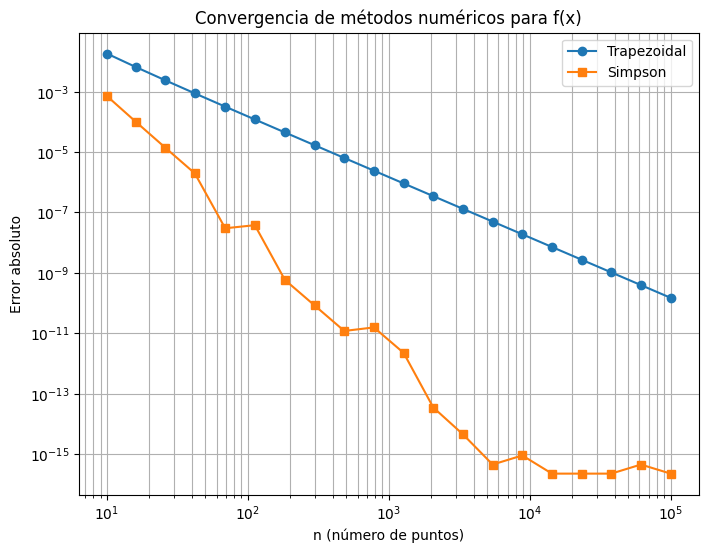

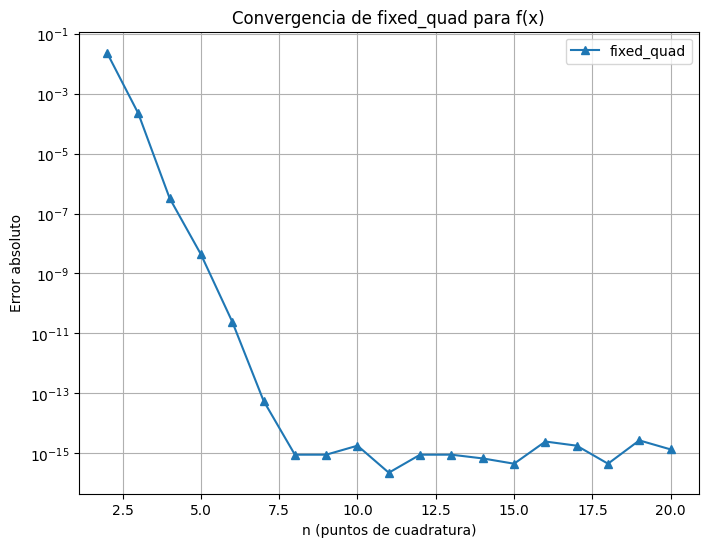

In [4]:
# Intervalos
a1, b1 = 0, np.pi/4
a2, b2 = np.exp(1), 1 + np.exp(1)

n_vals = np.logspace(1, 5, 20, dtype=int)

errors_trap = []
errors_simp = []

for n in n_vals:
    x = np.linspace(a1, b1, n)
    y = f(x)

    trap_result = trapezoid(y, x)
    simp_result = simpson(y, x)

    errors_trap.append(abs(trap_result - resultado_1))
    errors_simp.append(abs(simp_result - resultado_1))

# Gráfico log-log de los errores
plt.figure(figsize=(8, 6))
plt.loglog(n_vals, errors_trap, label="Trapezoidal", marker='o')
plt.loglog(n_vals, errors_simp, label="Simpson", marker='s')
plt.xlabel("n (número de puntos)")
plt.ylabel("Error absoluto")
plt.title("Convergencia de métodos numéricos para f(x)")
plt.legend()
plt.grid(True, which="both")
plt.show()

# Estudio de convergencia con fixed_quad
n_fixed_vals = np.arange(2, 21)
errors_fixed = [abs(fixed_quad(f, a1, b1, n=n)[0] - resultado_1) for n in n_fixed_vals]

# Gráfico de errores de fixed_quad
plt.figure(figsize=(8, 6))
plt.semilogy(n_fixed_vals, errors_fixed, marker='^', label="fixed_quad")
plt.xlabel("n (puntos de cuadratura)")
plt.ylabel("Error absoluto")
plt.title("Convergencia de fixed_quad para f(x)")
plt.grid(True, which='both')
plt.legend()
plt.show()


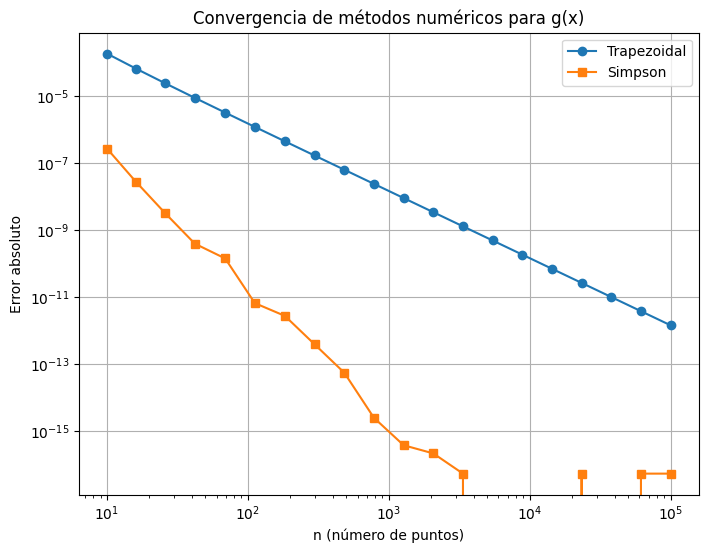

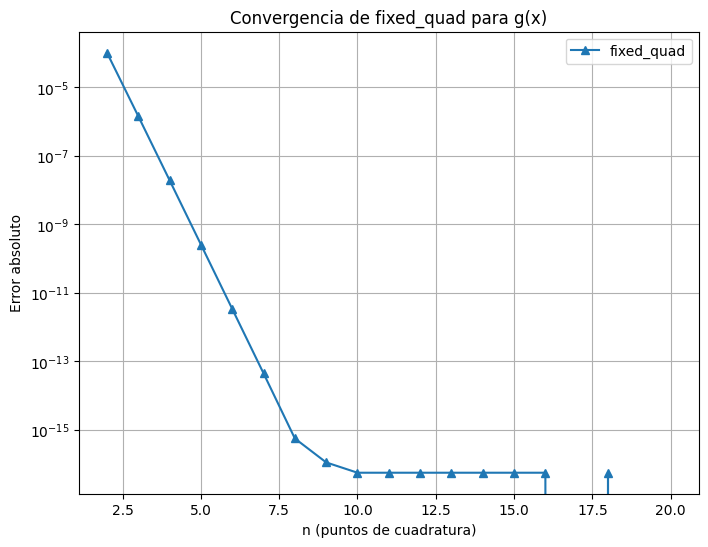

In [5]:
# Intervalos
a1, b1 = 0, np.pi/4
a2, b2 = np.exp(1), 1 + np.exp(1)

n_vals = np.logspace(1, 5, 20, dtype=int)

errors_trap = []
errors_simp = []

for n in n_vals:
    x = np.linspace(a2, b2, n)
    y = g(x)

    trap_result = trapezoid(y, x)
    simp_result = simpson(y, x)

    errors_trap.append(abs(trap_result - resultado_2))
    errors_simp.append(abs(simp_result - resultado_2))

# Gráfico log-log de los errores
plt.figure(figsize=(8, 6))
plt.loglog(n_vals, errors_trap, label="Trapezoidal", marker='o')
plt.loglog(n_vals, errors_simp, label="Simpson", marker='s')
plt.xlabel("n (número de puntos)")
plt.ylabel("Error absoluto")
plt.title("Convergencia de métodos numéricos para g(x)")
plt.legend()
plt.grid(True)
plt.show()

# Estudio de convergencia con fixed_quad
n_fixed_vals = np.arange(2, 21)
errors_fixed = [abs(fixed_quad(g, a2, b2, n=n)[0] - resultado_2) for n in n_fixed_vals]

# Gráfico de errores de fixed_quad
plt.figure(figsize=(8, 6))
plt.semilogy(n_fixed_vals, errors_fixed, marker='^', label="fixed_quad")
plt.xlabel("n (puntos de cuadratura)")
plt.ylabel("Error absoluto")
plt.title("Convergencia de fixed_quad para g(x)")
plt.grid(True)
plt.legend()
plt.show()

## Conclusiones:

- El método trapezoidal converge de forma lenta al ser de orden 2.

- El método simpson converge de forma más rápida al ser de orden 4, además comienza a oscilar al final debido al redondeo que se le realiza al final.


#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

## Código con quad

In [6]:
def integral_interna(x, y):
  integrando = lambda z: (np.sin(z/y))/y
  resultado, _ = quad(integrando, 0, x*y)
  return resultado
def integral_externa(x):
  integrando = lambda y: integral_interna(x, y)
  resultado, _ = quad(integrando, 0, x)
  return resultado
resultado_quad, error = quad(integral_externa, 0, np.pi)

print(f'Resultado con quad: {resultado_quad:.2f}')

Resultado con quad: 6.93


## Código con tplquad

In [7]:
f_triple = lambda z, y, x: (1/y)*(np.sin(z/y))
resultado_tplquad, _ = tplquad(f_triple, 0, np.pi,
                               lambda x: 0, lambda x: x,
                               lambda x, y: 0, lambda x, y: x * y)
print(f'Resultado con tplquad: {resultado_tplquad:.2f}')

Resultado con tplquad: 6.93


In [8]:
#Diferencia entre los dos métodos
print(f'La diferencia entre los dos valores es: {abs(resultado_quad-resultado_tplquad)}')

La diferencia entre los dos valores es: 0.0


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [9]:
def gauss_quad_scalar(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - a, b: Límites de integración.
    - n: Número de puntos para la cuadratura.

    Returns:
    - Aproximación de la integral.
    """
    x, w = roots_legendre(n)  # puntos y pesos en [-1, 1]
    # Cambio de variable
    x_mapped = 0.5 * (b - a) * x + 0.5 * (a + b)
    integral = 0.5 * (b - a) * np.sum(w * np.array([func(xi) for xi in x_mapped])) #La última parte nos ayuda a entregar el valor de la función por cada número en x_mapped
    return integral

In [10]:
def f(x, y, z):
    y_safe = y if abs(y) > 1e-12 else 1e-12 #Esto dice, si y es suficientemente distinta de cero, usa y, sino, usa 1e-12
    return (1 / y_safe) * np.sin(z / y_safe)
def integral_triple(n=20): #Función para calcular la integral triple con el número de puntos
    def integrand_x(x): #Integral externa
        def integrand_y(y): #Integral del medio
            def integrand_z(z): #Integral interna
                return f(x, y, z) #Retorna la función que se encuentra al inicio del presente código
            return gauss_quad_scalar(integrand_z, 0, x * y, n) #Integral del integrando z respecto a z
        return gauss_quad_scalar(integrand_y, 0, x, n) #Integral del integrando y respecto a y
    return gauss_quad_scalar(integrand_x, 0, np.pi, n) #Integral del integrando x respecto a x
resultado = integral_triple(n=20)
print("Resultado de la integral triple:", resultado)

Resultado de la integral triple: 6.934802200544673


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [16]:
from math import pi, sin, sqrt

def trapezoidal_adaptive(f, a, b, tol=1e-5, max_iter=20):
    n = 1
    h = (b - a)
    T_prev = h * (f(a) + f(b)) / 2
    for k in range(max_iter):
        n *= 2
        h = (b - a) / n
        x_mid = a + h * (np.arange(1, n, 2))
        T_curr = 0.5 * T_prev + h * np.sum(f(x_mid))
        if abs(T_curr - T_prev) < tol:
            return T_curr, n
        T_prev = T_curr
    return T_curr, n

def simpson_adaptive(f, a, b, tol=1e-5, max_iter=20):
    n = 2
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    S_prev = (h/3) * (f(a) + f(b) + 4*f(a + h) + 2*np.sum(f(x[2:-1:2])))
    for k in range(max_iter):
        n *= 2
        h = (b - a) / n
        x = np.linspace(a, b, n+1)
        S_curr = (h/3) * (f(a) + f(b) + 4*np.sum(f(x[1:-1:2])) + 2*np.sum(f(x[2:-1:2])))
        if abs(S_curr - S_prev) < tol:
            return S_curr, n
        S_prev = S_curr
    return S_curr, n

def gauss_quad_adaptive(f, a, b, tol=1e-5, max_n=50):
    prev = None
    for n in range(2, max_n+1):
        val, _ = fixed_quad(f, a, b, n=n)
        if prev is not None and abs(val - prev) < tol:
            return val, n
        prev = val
    return prev, max_n

def f1(x):
    return 1 / np.sqrt(np.tan(x))

def f2(x):
    return np.cos(x) / x**3

def inner_f3(x):
    return np.arcsin(np.sin(x))

def integrate_infinite(f, a, tol=1e-5, L0=10):
    L = L0
    while True:
        val1, _ = trapezoidal_adaptive(f, a, L, tol/10)
        tail_est = abs(f(L)) / L
        if tail_est < tol:
            return val1
        L *= 2

tol = 1e-5
delta = 1e-8  # para evitar singularidades en I1

results = {}

# I1
results['I1_trap']  = trapezoidal_adaptive(f1, delta, pi/2 - delta, tol)
results['I1_simp']  = simpson_adaptive(f1, delta, pi/2 - delta, tol)
results['I1_gauss'] = gauss_quad_adaptive(f1, delta, pi/2 - delta, tol)

# I2
results['I2_trap']  = integrate_infinite(f2, 1, tol)
results['I2_simp']  = integrate_infinite(f2, 1, tol)
results['I2_gauss'] = gauss_quad_adaptive(f2, 1, 50, tol)  # truncamos en 50

# I3
results['I3_trap']  = trapezoidal_adaptive(inner_f3, 0, pi/4, tol)
results['I3_simp']  = simpson_adaptive(inner_f3, 0, pi/4, tol)
results['I3_gauss'] = gauss_quad_adaptive(inner_f3, 0, pi/4, tol)

print("\nResultados con tol =", tol)
for key, val in results.items():
    print(f"{key}: {val}")


Resultados con tol = 1e-05
I1_trap: (np.float64(2.2271335788659616), 1048576)
I1_simp: (np.float64(2.2228323418183176), 2097152)
I1_gauss: (np.float64(2.1998333944159962), 50)
I2_trap: 0.018221516191661187
I2_simp: 0.018221516191661187
I2_gauss: (np.float64(0.018103892810801794), 29)
I3_trap: (np.float64(0.30842513753404244), 2)
I3_simp: (np.float64(0.30842513753404244), 4)
I3_gauss: (np.float64(0.30842513753404244), 3)
